<a href="https://colab.research.google.com/github/nevertonscariot/Bacia_Uruguai/blob/main/Dams_fluv_station_FOLIUM_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalar a biblioteca hydrobr e geopandas

[GitHub HydroBr](https://github.com/hydrobr/hydrobr)

Desenvolvida pelo Eng. Sanit. Amb. Walisson Carvalho e mestrando em Recursos Hídricos e Saneamento, pela Universidade Federal de Alagoas.

[GitHub GeoPandas](https://github.com/geopandas/geopandas)

**1.   Geração de clones:**

 
*   [GitHub GESPLA toolbox](https://github.com/gespla-iph-ufrgs/gespla.git)

 Biblioteca provedora de um conjunto de rotinas na forma de módulos Python 3. As rotinas serão operações unitárias que poderão ser acopladas em qualquer código Python.

*   [GitHub Néverton](https://github.com/nevertonscariot/Bacia_Uruguai.git)

  Repositório para obtenção de dados automatizado

2.   Importando bibliotecas





In [1]:
!pip install hydrobr    #email: cmwallisson@gmail.com 
!pip install --upgrade geopandas
#com shapefile \/:
#https://wallissoncarvalho.medium.com/utilizando-a-biblioteca-hydrobr-parte-1-fe6026fa1d04

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for hydrobr: filename=hydrobr-0.1.1-py3-none-any.whl size=15091 sha256=98a9fbb2b5bde292d56c46c09f3bf67362dbd15d3a536b5936284737115f4015
  Stored in directory: /root/.cache/pip/wheels/93/b2/26/9a3caf037f15e9ffea73655bc741a306a3e82a69b2e71db19f
Successfully built hydrobr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.6 MB/s 
     |████████████████████████████████| 6.3 MB 6.8 MB/s 
     |████████████████████████████████| 16.7 MB 245 kB/s 


In [2]:
!git clone https://github.com/gespla-iph-ufrgs/gespla.git
!git clone https://github.com/nevertonscariot/Bacia_Uruguai.git 

Cloning into 'gespla'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 256 (delta 31), reused 39 (delta 17), pack-reused 201
Receiving objects: 100% (256/256), 107.08 KiB | 1.45 MiB/s, done.
Resolving deltas: 100% (152/152), done.
Cloning into 'Bacia_Uruguai'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 77 (delta 0), reused 0 (delta 0), pack-reused 76
Unpacking objects: 100% (77/77), done.


In [3]:
import pandas as pd
import numpy as np
import hydrobr
import matplotlib.pyplot as plt
import geopandas as gpd #biblioteca responsável pelo georreferenciamento dos dados
import folium 

from plotly.offline import plot
from gespla import download, load, resample, tsa, visuals
from shapely.geometry import Point #biblioteca responsável pelo georreferenciamento dos dados
from folium import plugins
from Bacia_Uruguai import graphics as gu
folium.__version__

import plotly
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px


# 5. Importa metadados de vazão da ANA com GESPLA

In [4]:
#dowload dos metadados da ana de flowipitação
meta_flow = download.metadata_ana_flow(folder='.',)
print('Arquivo foi salvo em: {}'.format(meta_flow))

Arquivo foi salvo em: ./metadata_ANA-flow_2022-09-04.txt


# 6. Carrega metadados utilizando funções GESPLA

In [5]:
# importar DataFrames dos metadados
df_meta_flow = load.metadata_ana_flow(file=meta_flow)  # flowip
print('\n flowip: ')
print(df_meta_flow.head(10).to_string()) 


 flowip: 
                   Name CodEstacao Type  DrainageArea  SubBasin              City     State   Responsible  Latitude  Longitude  StartDate    EndDate  NYD    MD  N_YWOMD  YWMD
0                 BORJA   10064000    1      115000.0        10              PERU      PERU  SENAMHI-PERU   -4.4700   -77.5500 1986-02-02 2013-03-15   28  27.6       17  39.3
1             SAN REGIS   10070500    1      316000.0        10              PERU      PERU  SENAMHI-PERU   -4.5100   -73.9500 1994-05-16 2005-10-17   12   0.1       10  16.7
2               REQUENA   10074800    1        4738.0        10              PERU      PERU  SENAMHI-PERU   -5.0300   -73.8300 1984-10-25 2005-10-17   22   8.6       15  31.8
3           TAMISHIYACU   10075000    1        8985.0        10              PERU      PERU  SENAMHI-PERU   -4.0036   -73.1611 1983-10-02 2010-09-13   28   5.0       23  17.9
4  FRANCISCO DE ORELLAN   10080900    1           NaN        10              PERU      PERU  SENAMHI-PERU   -0.473

In [6]:
#@title
df_meta_flow.info() #indices das colunas apenas para vacilitar vizualização

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          3771 non-null   object        
 1   CodEstacao    3771 non-null   object        
 2   Type          3771 non-null   category      
 3   DrainageArea  3707 non-null   float64       
 4   SubBasin      3771 non-null   int64         
 5   City          3770 non-null   object        
 6   State         3771 non-null   category      
 7   Responsible   3771 non-null   category      
 8   Latitude      3771 non-null   float64       
 9   Longitude     3771 non-null   float64       
 10  StartDate     3771 non-null   datetime64[ns]
 11  EndDate       3771 non-null   datetime64[ns]
 12  NYD           3771 non-null   int64         
 13  MD            3771 non-null   float64       
 14  N_YWOMD       3771 non-null   int64         
 15  YWMD          3771 non-null   float64 

In [7]:
#@title
# Criando uma lista de geometrias no formato de ponto
pontos = [Point(x) for x in zip(df_meta_flow.Longitude,
                                df_meta_flow.Latitude)]
# Definindo o sistema de coordenadas
crs={'proj':'latlong','ellps':'WGS84','datum':'WGS84','no_def':True} 

# Criando o geodataframe
df_meta_flow_geo = gpd.GeoDataFrame(df_meta_flow, geometry=pontos,crs=crs) 

# 7. Plotagem dos pontos das estações fluviométricas

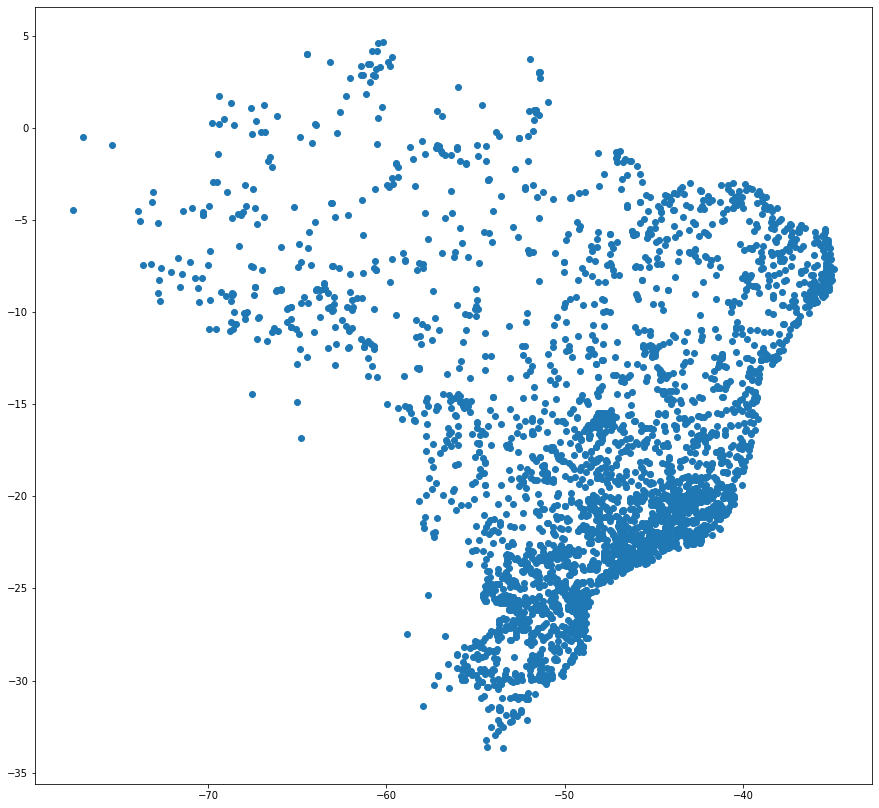

In [8]:
df_meta_flow_geo.plot(figsize=(15,15))

Lista de estações com coleta de sedimento no Uruguai

In [9]:
#transformo a coluna CodEstação em int
df_meta_flow = df_meta_flow.astype({"CodEstacao": int})

In [10]:
list_sed = [70200000,70700000,70841500,71300000,71380450,71383000,71498000,71550000,71800000,72300000,72428000,72430000,72630000,72700000,72810000,72870900,72880000,72980000,73010000,73170000,73300000,73350000,73389000,73390000,73480000,73550000,73658000,73730000,73770000,73850000,73960000,73970000,74100000,74200500,74270000,74300200,74320000,74370000,74400000,74462000,74463000,74465000,74467000,74470000,74480000,74600000,74610000,74700000,74750000,74800000,74900000,75155000,75155010,75185000,75186000,75205000,75230000,75295000,75320000,75450000,75500000,75700000,75881900,76100000,76120000,76250000,76310000,76380000,76431000,76440000,76560000,76750000,76800000,77150000,77500000,79400000]

In [11]:
#filtro as estaçoes que constam na lista
df = df_meta_flow[df_meta_flow.CodEstacao.isin(list_sed)]

In [12]:
df

,Name,CodEstacao,Type,DrainageArea,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD,geometry
3252,INVERNADA VELHA,70200000,1,2820.00,70,BOM JESUS,RIO GRANDE DO SUL,ANA,-28.4394,-50.3019,1964-06-08,2019-12-31,56,1.2,46,17.9,POINT (-50.30190 -28.43940)
3258,PASSO SOCORRO,70700000,1,8440.00,70,VACARIA,RIO GRANDE DO SUL,ANA,-28.2108,-50.7586,1940-02-12,2005-06-30,66,5.0,59,10.6,POINT (-50.75860 -28.21080)
3262,RIO BONITO,71300000,1,2000.00,71,BOCAINA DO SUL,SANTA CATARINA,ANA,-27.7022,-49.8400,1942-03-01,2019-10-31,78,0.1,73,6.4,POINT (-49.84000 -27.70220)
3267,PONTE ALTA DO SUL,71383000,1,4610.00,71,PONTE ALTA,SANTA CATARINA,ANA,-27.4858,-50.3917,1956-11-01,2018-01-31,63,0.0,59,6.3,POINT (-50.39170 -27.48580)
3273,PASSO MAROMBAS,71498000,1,3680.00,71,CURITIBANOS,SANTA CATARINA,ANA,-27.3339,-50.7539,1940-04-22,2019-11-30,80,0.0,77,3.8,POINT (-50.75390 -27.33390)
3274,PASSO CARU,71550000,1,10000.00,71,SÃO JOSÉ DO CERRITO,SANTA CATARINA,ANA,-27.5381,-50.8600,1951-01-01,2012-10-10,62,0.0,61,1.6,POINT (-50.86000 -27.53810)
3276,COLÔNIA SANTANA,71800000,1,13200.00,71,ANITA GARIBALDI,SANTA CATARINA,ANA,-27.6500,-51.0500,1964-01-01,1985-02-28,22,0.2,19,13.6,POINT (-51.05000 -27.65000)
3278,PASSO DO VIRGILIO,72300000,1,29300.00,72,MACHADINHO,RIO GRANDE DO SUL,ANA,-27.5011,-51.7136,1971-01-01,2001-05-03,31,32.4,17,45.2,POINT (-51.71360 -27.50110)
3280,PASSO DO GRANZOTTO,72430000,1,1620.00,72,SANANDUVA,RIO GRANDE DO SUL,ANA,-27.8786,-51.7547,1957-05-14,2019-12-31,63,0.7,60,4.8,POINT (-51.75470 -27.87860)
3283,PASSO SANTA TEREZA,72630000,1,2800.00,72,PAIM FILHO,RIO GRANDE DO SUL,ANA,-27.7067,-51.8853,1957-10-17,2019-12-31,63,0.0,62,1.6,POINT (-51.88530 -27.70670)


In [13]:
df.to_csv('csv para editar.csv', sep=';')

In [14]:
df =  pd.read_csv('/content/drive/MyDrive/BOLSA_IC/Banco_de_Dados/csv_sed.csv', sep=';', encoding="latin_1")

In [15]:
df

,Unnamed: 0,Name,CodEstacao,Type,DrainageArea,SubBasin,Rio,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD,geometry
0,1,INVERNADA VELHA,70200000,1,2820.00,70,NaN,BOM JESUS,RIO GRANDE DO SUL,ANA,-28.4394,-50.3019,08/06/1964,31/12/2019,56.0,1.2,46.0,17.9,POINT (-50.3019 -28.4394)
1,2,PASSO SOCORRO,70700000,1,8440.00,70,NaN,VACARIA,RIO GRANDE DO SUL,ANA,-28.2108,-50.7586,12/02/1940,30/06/2005,66.0,5.0,59.0,10.6,POINT (-50.7586 -28.2108)
2,3,PCH MOINHO MONTANTE,70841500,1,189.00,70,NaN,ESMERALDA,RIO GRANDE DO SUL,MOINHO,-28.0819,-51.2583,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-51.2583 -28.0819)
3,4,RIO BONITO,71300000,1,2000.00,71,NaN,BOCAINA DO SUL,SANTA CATARINA,ANA,-27.7022,-49.8400,01/03/1942,31/10/2019,78.0,0.1,73.0,6.4,POINT (-49.84 -27.7022)
4,5,PCH TUPITINGA MONTANTE,71380450,1,288.00,71,NaN,CAMPOS NOVOS,SANTA CATARINA,RPEE,-27.5214,-51.4131,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-51.4131 -27.5214)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,ALEGRETE,76750000,1,5867.84,76,NaN,ALEGRETE,RIO GRANDE DO SUL,ANA,-29.7683,-55.7875,31/10/1940,31/12/2019,80.0,1.8,67.0,16.2,POINT (-55.7875 -29.7683)
72,73,PASSO MARIANO PINTO,76800000,1,42500.00,76,NaN,ITAQUI,RIO GRANDE DO SUL,ANA,-29.3092,-56.0553,15/05/1953,31/10/2019,67.0,2.7,56.0,16.4,POINT (-56.0553 -29.3092)
73,74,URUGUAIANA,77150000,1,190000.00,77,NaN,URUGUAIANA,RIO GRANDE DO SUL,ANA,-29.7486,-57.0886,13/03/1942,30/11/2019,78.0,0.1,75.0,3.8,POINT (-57.0886 -29.7486)
74,75,QUARAÃ,77500000,1,4570.00,77,NaN,QUARAÃ,RIO GRANDE DO SUL,ANA,-30.3844,-56.4656,01/03/1993,31/12/2019,27.0,0.6,22.0,18.5,POINT (-56.4656 -30.3844)


In [16]:
coordenadas = df[['Latitude', 'Longitude',]]

# 8. Filtragem dos pontos por camada mascara da sub-bacia

# 10. Filtra coordenadas dos pontos para usar na plotagem do gráfico espacial

In [17]:
df_bar = pd.read_csv('/content/drive/MyDrive/BOLSA_IC/Banco_de_Dados/seleçao barragens.csv', sep=';', encoding="latin_1")

In [18]:
df_bar

,Codigo_SNISB,Nome_da_Barragem,Uso_Principal,UF,Municipio,Categoria_de_Risco,Dano_Potencial_Associado,Nome_do_Empreendedor,orgão_Fiscalizador,Codigo_Barragem_Fiscalizador,...,Dominio,Data_da_ultima_Inspeção,Tipo_da_ultima_Inspeção,Nivel_de_Perigo_Global,Possui_Eclusa,Fase_da_Vida,Latitude,Longitude,Completude,Data
0,5101,UHE Ita - Principal,Hidroeletrica,SC,ITa,Baixo,Alto,ENGIE BRASIL ENERGIA S.A.,Agência Nacional de Energia Eletrica - ANEEL,1965,...,NaN,NaN,NaN,NaN,NaN,Operação,-27.2775,-52.3789,boa,2000
1,4759,UHE Barra Grande - Barra Grande,Hidroeletrica,SC,ANITA GARIBALDI,Baixo,Alto,BAESA-ENERGeTICA BARRA GRANDE S/A,Agência Nacional de Energia Eletrica - ANEEL,2010,...,NaN,NaN,NaN,NaN,NaN,Operação,-27.7764,-51.1894,boa,2005
2,5096,UHE Machadinho - Barragem Principal,Hidroeletrica,SC,PIRATUBA,Baixo,Alto,DME DISTRIBUIÇÃO S.A. - DMED,Agência Nacional de Energia Eletrica - ANEEL,2174,...,NaN,NaN,NaN,NaN,NaN,Operação,-27.5253,-51.7889,boa,2002
3,5039,UHE Passo Fundo - Principal,Hidroeletrica,RS,TRINDADE DO SUL,Baixo,Alto,ENGIE BRASIL ENERGIA S.A.,Agência Nacional de Energia Eletrica - ANEEL,1972,...,NaN,NaN,NaN,NaN,NaN,Operação,-27.5556,-52.7406,boa,1973
4,5033,UHE Foz do Chapeco - Principal - FC,Hidroeletrica,SC,aGUAS DE CHAPECo,Baixo,Alto,FOZ DO CHAPECo ENERGIA S.A.,Agência Nacional de Energia Eletrica - ANEEL,3028,...,NaN,NaN,NaN,NaN,NaN,Operação,-27.1400,-53.0406,boa,2010
5,4721,UHE Campos Novos - Campos Novos,Hidroeletrica,SC,CAMPOS NOVOS,Baixo,Alto,CAMPOS NOVOS ENERGIA S.A.,Agência Nacional de Energia Eletrica - ANEEL,2034,...,NaN,NaN,NaN,NaN,NaN,Operação,-27.6000,-51.3167,boa,2007
6,4808,UHE Garibaldi - Terra/Enrocamento,Hidroeletrica,SC,CERRO NEGRO,Baixo,Alto,RIO CANOAS ENERGIA S.A.,Agência Nacional de Energia Eletrica - ANEEL,244,...,NaN,NaN,NaN,NaN,NaN,Operação,-27.6247,-50.9839,boa,2013
7,4166,UHE São Jose - São Jose,Hidroeletrica,RS,SALVADOR DAS MISSÕES,Baixo,Alto,IJUi ENERGIA S.A.,Agência Nacional de Energia Eletrica - ANEEL,2677,...,NaN,NaN,NaN,NaN,NaN,Operação,-28.1747,-54.8189,boa,2011
8,5183,UHE Monjolinho (Antiga Alzir dos Santos Antune...,Hidroeletrica,RS,FAXINALZINHO,Baixo,Alto,STATKRAFT ENERGIAS RENOVaVEIS S/A,Agência Nacional de Energia Eletrica - ANEEL,1953,...,NaN,NaN,NaN,NaN,NaN,Operação,-27.3461,-52.7314,boa,2009
9,4192,UHE Quebra Queixo - Barragem de Enrocamento co...,Hidroeletrica,SC,IPUAÇU,Baixo,Alto,Companhia Energetica Chapeco,Agência Nacional de Energia Eletrica - ANEEL,807,...,NaN,NaN,NaN,NaN,NaN,Operação,-26.6692,-52.5556,boa,2003


In [19]:
rios = gpd.read_file('/content/drive/MyDrive/BOLSA_IC/rios100km/Cursos dagua maior que 100km.shp')

In [20]:
#coord = df_bar[['Latitude', 'Longitude',]]

In [21]:
#coord.info()

In [22]:
#coord = coord.astype({"Latitude": int},{"Longitude": int})

In [23]:
#@Criação do mapa base
baseMap = folium.Map(
    #width = '100%',   height = '100%',
    width = 800,   height = 800,
    location = [-29.50000, -53.50000], # <- BACIA URUGUAI
    zoom_start = 7,
     tiles="Stamen Terrain"
)

['red', 'blue', 'green', 'purple', 'orange', 'darkred',
             'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
             'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
             'gray', 'black', 'lightgray']

In [24]:
#plotagem estaçoes no mapa base
for i in range(0,len(df)):
  folium.Marker( [df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
                icon=folium.Icon(color='beige', icon='info-sign'),
  #color = '#00FF69' ,
  #fill = '#00A1B3',
  tooltip = 
            '<li><bold> NOME: '+ str(df.iloc[i]['Name'])+"</li></bold>" +
            '<li><bold> CÓDIGO: '+ str(df.iloc[i]['CodEstacao']) + "</li></bold>" +
            '<li><bold> ÁREA DREN.: '+ str(df.iloc[i]['DrainageArea']) +"</li></bold>" +
            '<li><bold> SUB-BACIA: '+ str(df.iloc[i]['SubBasin']) +"</li></bold>" +
            '<li><bold> LAT: '+ str(df.iloc[i]['Latitude'])+"</li></bold>" +
            '<li><bold> LONG: '+ str(df.iloc[i]['Longitude']) + "</li></bold>" +
            '<li><bold> CIDADE: '+ str(df.iloc[i]['City']) + "</li></bold>",
  ).add_to(baseMap)

In [25]:
#plotagem barragens no mapa base
for j in range(0,len(df_bar)):
  folium.Marker( [df_bar.iloc[j]['Latitude'], df_bar.iloc[j]['Longitude']],
                icon=folium.Icon(color='Red',prefix='fa',icon='cloud'),
  #color = '#00FF69' ,
  
  tooltip = 
            '<li><bold> NOME: '+ str(df_bar.iloc[j]['Nome_da_Barragem'])+"</li></bold>" +
            '<li><bold> INICIO DE OPERAÇÃO: '+ str(df_bar.iloc[j]['Data']) + "</li></bold>" +
            '<li><bold> CAPACIDADE hm³: '+ str(df_bar.iloc[j]['Capacidade_hm']) + "</li></bold>" +
            '<li><bold> UF: '+ str(df_bar.iloc[j]['UF']) +"</li></bold>" +
            '<li><bold> LAT: '+ str(df_bar.iloc[j]['Latitude'])+"</li></bold>" +
            '<li><bold> LONG: '+ str(df_bar.iloc[j]['Longitude'])+"</li></bold>",
  ).add_to(baseMap)

In [26]:
#plotagem rios no mapa base
for _, r in rios.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                          style_function=lambda x: {'fillColor': 'red'})
    #folium.Popup(['nucompcda']).add_to(geo_j)
    geo_j.add_to(baseMap)

In [29]:
baseMap

# 11. Salva o mapa espacial em um htlm

In [28]:
baseMap.save('Mapa_esquematico' + '.html')